In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="fr-fr"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.
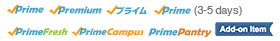

In [2]:
# connect to amazon using local host computer
url = 'https://www.amazon.fr/New-Balance-Besoin-dentrer-plomb/dp/B0815T2RH7/ref=sl_ob_desktop_0_3_v2?_encoding=UTF8&pd_rd_w=ly3ch&pf_rd_p=1383201b-7b1f-4e71-b7c1-d45d0c59adbd&pf_rd_r=TZKMTJ2SJPEKZ86SF7S6&pd_rd_r=64e8393e-f729-4926-b3fb-ccd9f6a76625&pd_rd_wg=95qF2'
# http://httpbin.org/get
headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36",
           "Accept-Encoding": "gzip, deflate",
           "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
           "DNT":"1","Connection":"close",
           "Upgrade-Insecure-Requests": "1"
  }
page = requests.get(url, headers = headers)
soup1 = BeautifulSoup(page.content, 'html.parser')
print(soup1)

In [4]:
# better format of soup1 with prettify()
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")
# print(soup2)
title = soup2.find(id ='productTitle').get_text()
print(title)


                   New Balance Msptv2, Chaussure de Course sur Route Homme
                  


In [30]:
price = soup2.find("span",class_ = 'a-offscreen').get_text()
print(price)


                      57,79€
                     


In [31]:
price = price.strip().replace("€","")
title = title.strip()
print(price,'\n', title)b

57,79 
 New Balance Msptv2, Chaussure de Course sur Route Homme


In [35]:
today = datetime.date.today()

In [36]:
import csv
header = ['Title','Price','Date']
data = [title, price,today]
'''
with open('Amazondataset.csv','w', newline ='', encoding = 'UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)
'''


In [37]:
df = pd.read_csv('Amazondataset.csv')
print(df)

                                               Title  Price        Date
0  New Balance Msptv2, Chaussure de Course sur Ro...  57,79  2022-04-18


In [38]:
# Appending new data into the csv file
with open('Amazondataset.csv','a+', newline ='', encoding = 'UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)


In [39]:
def check_price():
    url = 'https://www.amazon.fr/New-Balance-Besoin-dentrer-plomb/dp/B0815T2RH7/ref=sl_ob_desktop_0_3_v2?_encoding=UTF8&pd_rd_w=ly3ch&pf_rd_p=1383201b-7b1f-4e71-b7c1-d45d0c59adbd&pf_rd_r=TZKMTJ2SJPEKZ86SF7S6&pd_rd_r=64e8393e-f729-4926-b3fb-ccd9f6a76625&pd_rd_wg=95qF2'
# http://httpbin.org/get
    headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36",
           "Accept-Encoding": "gzip, deflate",
           "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
           "DNT":"1","Connection":"close",
           "Upgrade-Insecure-Requests": "1"
  }
    page = requests.get(url, headers = headers)
    soup1 = BeautifulSoup(page.content, 'html.parser')
    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    title = soup2.find(id ='productTitle').get_text().strip()
    price = soup2.find("span",class_ = 'a-offscreen').get_text().strip().replace("€","")
    import datetime
    today = datetime.date.today()
    import csv
    header = ['Title','Price','Date']
    data = [title, price,today]
    with open('Amazondataset.csv','a+', newline ='', encoding = 'UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
    if(price < 30):
        send_mail()
      

In [40]:
# Check daily price
'''
while(True):
    check_price()
    time.sleep(86400)
'''

KeyboardInterrupt: 

In [41]:
df = pd.read_csv('Amazondataset.csv')
print(df)

                                               Title  Price        Date
0  New Balance Msptv2, Chaussure de Course sur Ro...  57,79  2022-04-18
1  New Balance Msptv2, Chaussure de Course sur Ro...  57,79  2022-04-18
2  New Balance Msptv2, Chaussure de Course sur Ro...  57,79  2022-04-18
3  New Balance Msptv2, Chaussure de Course sur Ro...  57,79  2022-04-18


In [42]:
# Send email to notify when the product is affordable:
def send_email():
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('abcd@gmail.com','xxxxxxxxxxxx')
    subject ="The product you want is below 30 now, go check it!"
    body = "This is a great chance to buy it"
    msg = f"Subject:{subject}\n\n{body}"
    server.sendmail('abcd@gmail.com', msg)